## Plot ground displacement measured in Central Park with N.Y.C. Electricity consumption

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
% matplotlib inline
plt.rcParams.update({'font.size': 18})


In [2]:
# Set x-axis limits for plotting: datetime(YEAR, MONTH, DAY)
tmin = datetime(2020, 2, 7)
tmax = datetime(2020, 5, 15)

datadir = './Data/'

# Load seismic data
fname_n = 'LD.CPNY.2020-02-09.2020-05-15.5_15Hz.BHZ'
df_noise = pd.read_csv(datadir+fname_n+'.csv',parse_dates=['t_cent'])

# Load N.Y.C. electricity data
fname_l = 'load_reduction_hourly_NYC'
df_load = pd.read_csv(datadir+fname_l+'.csv',parse_dates=['Date'])

# Convert noise timestamps to NYC local time
df_noise = df_noise.set_index('t_cent').tz_localize('UTC').tz_convert('America/New_York')
df_noise = df_noise.reset_index()

# NYC stay at home 2020/3/22 8pm EST (UTC - 4)
nyc_SAH = datetime(2020,3,22,20,0) + timedelta(0,4*60*60)

# NYC First COVID-19 death 2020/3/14 EST (UTC - 4)
nyc_1st = datetime(2020,3,14,0,0)

# NYC subway closed 1am-5am 2020/5/6 EST (UTC - 4)
nyc_subway = datetime(2020,5,6,0,0)


## Plot hourly values using twin y-axis

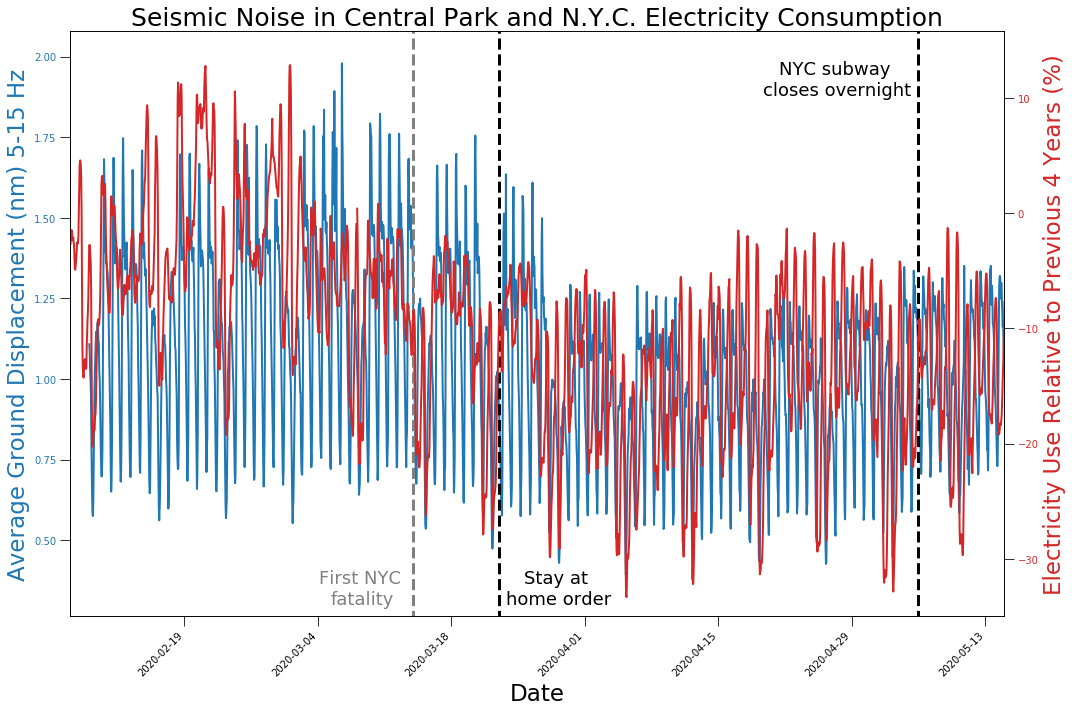

In [3]:
# Plot
fig, ax1 = plt.subplots(figsize=(15,10))
color = 'tab:blue'

# Plot hourly noise
ax1.plot(df_noise.t_cent,df_noise.disp_avg*1e9,'-',linewidth=2,color=color)
# Plot vertical bars marking important times (and label them with text)
ax1.plot([nyc_SAH, nyc_SAH],[0, 2.1],'--k',linewidth=3)
ax1.text(nyc_SAH+timedelta(6.3),df_noise.disp_avg.min()*1e9*0.8,'Stay at \nhome order',fontsize=18,horizontalalignment='center')
ax1.plot([nyc_1st, nyc_1st],[0, 2.1],'--',linewidth=3,color='gray')
ax1.text(nyc_1st-timedelta(5.3),df_noise.disp_avg.min()*1e9*0.8,'First NYC \nfatality',color='gray',fontsize=18,horizontalalignment='center')
plt.plot([nyc_subway, nyc_subway],[0, 2.1],'--',linewidth=3,color='black')
plt.text(nyc_subway-timedelta(8.5),df_noise.disp_avg.max()*1e9*0.95,'NYC subway \ncloses overnight',color='black',fontsize=18,horizontalalignment='center')
# Make axes look pretty
ax1.set_ylabel('Average Ground Displacement (nm) 5-15 Hz',fontsize=23,color=color)
ax1.set_xlabel('Date',fontsize=23)
ax1.set_xlim([tmin, tmax])
ax1.set_ylim(df_noise.disp_avg.min()*0.7*1e9,df_noise.disp_avg.max()*1.05*1e9)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Seismic Noise in Central Park and N.Y.C. Electricity Consumption',fontsize=25)
ax1.tick_params('both', length=10, which='major')

# Plot hourly energy data on same figure with different y axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.plot(df_load.Date,df_load.load_resid,'-',linewidth=2,color=color)
ax2.plot()
# Make axes look pretty
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Electricity Use Relative to Previous 4 Years (%)',fontsize=23,color=color)
ax2.set_ylim(df_load.load_resid.min()*1.05,df_load.load_resid.max()*1.05)
ax2.tick_params('both', length=10, which='major')

# Rotate tick marks on x-axis
plt.setp(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()
fig.savefig(fname_n+'_'+fname_l+'_HOURLY.pdf')


## Plot Daily Values

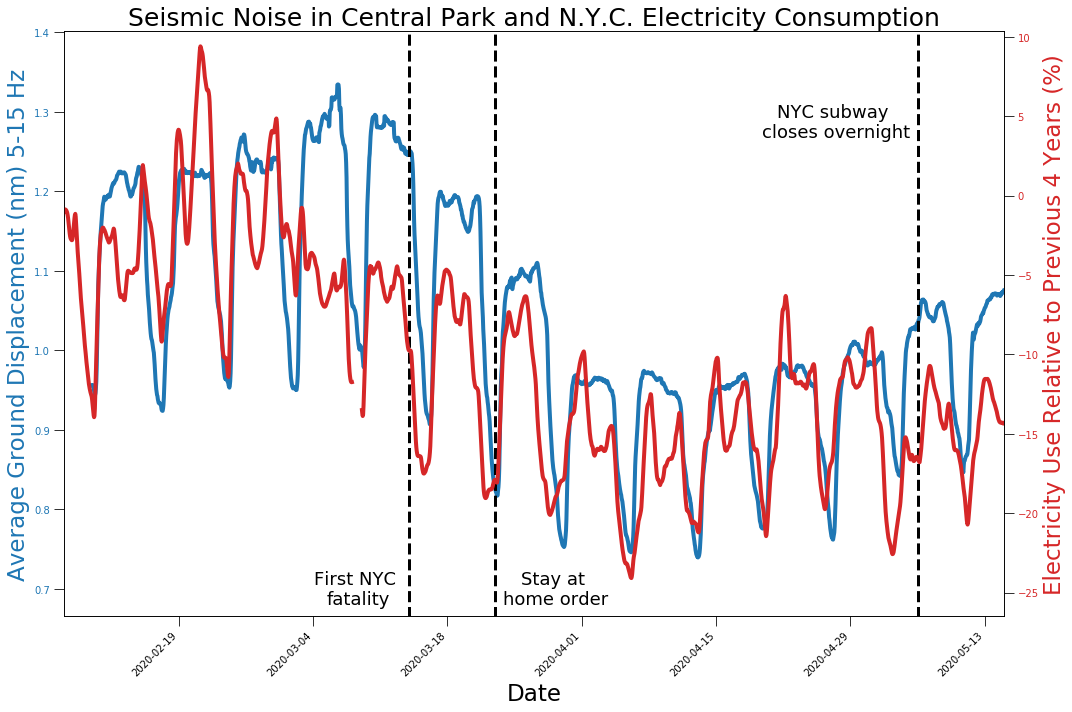

In [4]:
# Daily averages
fig, ax1 = plt.subplots(figsize=(15,10))
color = 'tab:blue'

# Plot Daily noise
ax1.plot(df_noise.t_cent,df_noise.daily_average*1e9,'-',linewidth=4,color=color)
# Plot vertical bars marking important times (and label them with text)
ax1.plot([nyc_SAH, nyc_SAH],[0, 2.1],'--k',linewidth=3)
ax1.text(nyc_SAH+timedelta(6.3),df_noise.daily_average.min()*1e9*0.92,'Stay at \nhome order',fontsize=18,horizontalalignment='center')
ax1.plot([nyc_1st, nyc_1st],[0, 2.1],'--k',linewidth=3)
ax1.text(nyc_1st-timedelta(5.3),df_noise.daily_average.min()*1e9*0.92,'First NYC \nfatality',color='black',fontsize=18,horizontalalignment='center')
plt.plot([nyc_subway, nyc_subway],[0, 2.1],'--',linewidth=3,color='black')
plt.text(nyc_subway-timedelta(8.5),df_noise.daily_average.max()*1e9*0.95,'NYC subway \ncloses overnight',color='black',fontsize=18,horizontalalignment='center')
# Make axes look pretty
ax1.set_ylabel('Average Ground Displacement (nm) 5-15 Hz',fontsize=23,color=color)
ax1.set_xlabel('Date',fontsize=23)
ax1.set_xlim([tmin, tmax])
ax1.set_ylim(df_noise.daily_average.min()*0.9*1e9,df_noise.daily_average.max()*1.05*1e9)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.grid(True)
ax1.set_title('Seismic Noise in Central Park and N.Y.C. Electricity Consumption',fontsize=25)
ax1.tick_params('both', length=10, which='major')

# Calculate daily load averages using boxcar window
dt_hr = (df_load.Date[1]-df_load.Date[0]).seconds/60/60  # Hours between samples
df_load['daily_average'] = df_load.load_resid.rolling(int(24/dt_hr),win_type='boxcar').mean()
# Plot daily average load
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.plot(df_load.Date,df_load.daily_average,'-',linewidth=4,color=color)
ax2.plot()
# Make axes look pretty
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Electricity Use Relative to Previous 4 Years (%)',fontsize=23,color=color)
ax2.set_ylim(df_load.daily_average.min()*1.1,df_load.daily_average.max()*1.1)
ax2.tick_params('both', length=10, which='major')

# Rotate tick marks on x-axis
plt.setp(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()
fig.savefig(fname_n+'_'+fname_l+'_DAILY.pdf')